In [1]:
%matplotlib inline

import matplotlib
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

pd.set_option('display.mpl_style', 'default') # Make the graphs a bit prettier
plt.rcParams['figure.figsize'] = (10, 7)

In [46]:
data = np.load('/home/jvdzwaan/data/dilipad/results/20112012/adj-parties/perspective_jsd_100.npy')

In [47]:
data.shape

(100, 12, 12)

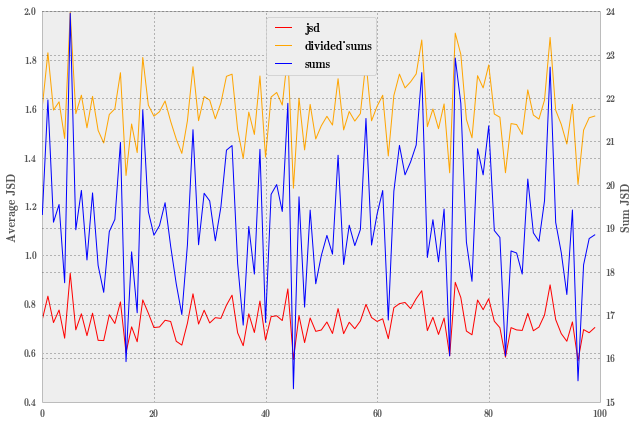

In [48]:
jsd_sums = data.sum(axis=(2, 1))

jsd = pd.read_csv('/home/jvdzwaan/data/dilipad/results/20112012/adj-parties/jsd_100.csv', index_col=0)
jsd['sums'] = jsd_sums
jsd['divided_sums'] = jsd_sums/12.0

fig = plt.figure() # Create matplotlib figure

ax = fig.add_subplot(111) # Create matplotlib axes
ax2 = ax.twinx() # Create another axes that shares the same x-axis as ax.

jsd.jsd.plot(kind='line', color='red')
jsd.divided_sums.plot(kind='line', color='orange')
jsd.sums.plot(kind='line', color='blue', ax=ax2)

ax.set_ylabel('Average JSD')
ax2.set_ylabel('Sum JSD')

# ask matplotlib for the plotted objects and their labels
lines, labels = ax.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax2.legend(lines + lines2, labels + labels2, loc=0)

plt.show()

         jsd       sums  divided_sums
5   0.926441  23.951741      1.995978
74  0.889381  22.921336      1.910111
91  0.878914  22.711407      1.892617
44  0.862462  21.877485      1.823124
68  0.855030  22.585156      1.882096
27  0.842293  21.270205      1.772517
34  0.836783  20.904592      1.742049
1   0.832760  21.955422      1.829618
75  0.826819  21.877016      1.823085
80  0.822277  21.358756      1.779896

[10 rows x 3 columns]


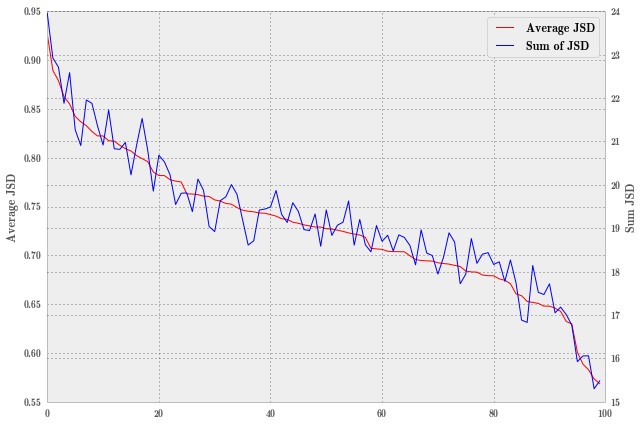

In [49]:
# sorted by avarage jsd
jsd2 = jsd.sort(['jsd'], ascending=False)
print jsd2[:10]
jsd2 = jsd2.reset_index(drop=True)
#print jsd2

fig = plt.figure() # Create matplotlib figure

ax = fig.add_subplot(111) # Create matplotlib axes
ax2 = ax.twinx() # Create another axes that shares the same x-axis as ax.

jsd2.jsd.plot(kind='line', color='red')
jsd2.sums.plot(kind='line', color='blue', ax=ax2)

ax.set_ylabel('Average JSD')
ax2.set_ylabel('Sum JSD')

# ask matplotlib for the plotted objects and their labels
lines, labels = ax.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax2.legend(lines + lines2, ['Average JSD', 'Sum of JSD'], loc=0)

plt.show()

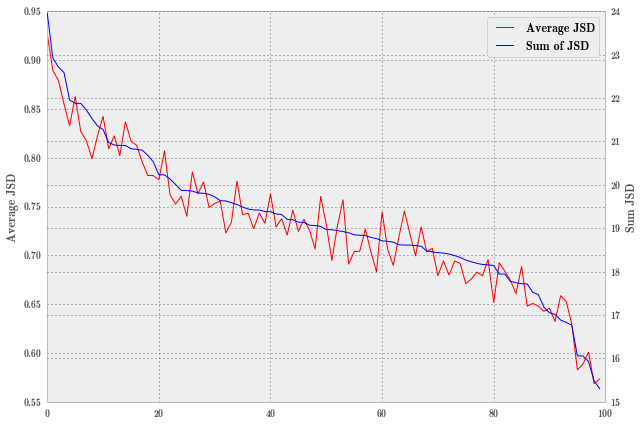

In [5]:
# sorted by sum jsd
jsd2 = jsd.sort(['sums'], ascending=False)
jsd2 = jsd2.reset_index(drop=True)
#print jsd2

fig = plt.figure() # Create matplotlib figure

ax = fig.add_subplot(111) # Create matplotlib axes
ax2 = ax.twinx() # Create another axes that shares the same x-axis as ax.

jsd2.jsd.plot(kind='line', color='red')
jsd2.sums.plot(kind='line', color='blue', ax=ax2)

ax.set_ylabel('Average JSD')
ax2.set_ylabel('Sum JSD')

# ask matplotlib for the plotted objects and their labels
lines, labels = ax.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax2.legend(lines + lines2, ['Average JSD', 'Sum of JSD'], loc=0)

plt.show()

In [6]:
import glob
import re
# gegeven topic nummer, print topic

# laad topics
topics = pd.read_csv('/home/jvdzwaan/data/dilipad/results/20112012/adj-parties/topics_100.csv', index_col=0, encoding='utf-8')

# laad opinions
opinions = {}
opinion_files = glob.glob('/home/jvdzwaan/data/dilipad/results/20112012/adj-parties/opinions_*_100.csv')
for f in opinion_files:
    m = re.match(r'.+opinions_(.+)_100.csv', f)
    name = m.group(1)
    opinions[name] = pd.read_csv(f, index_col=0, encoding='utf-8')

In [7]:
from cptm.utils.topics import get_top_topic_words, topic_str

df = get_top_topic_words(topics, opinions, 5)
print topic_str(df, single_line=True, weights=True)

topic:	 euro*0.0519 unie*0.0486 crisis*0.0477 lidstaat*0.0337 markt*0.0303 bevoegdheid*0.0199 munt*0.0164 bevolking*0.0162 soevereiniteit*0.0138 visie*0.0135
PvdD:	 democratisch*0.0800 monetair*0.0580 gezamenlijk*0.0458 grieks*0.0449 vergaand*0.0436 gemeenschappelijk*0.0364 onmogelijk*0.0311 zuidelijk*0.0306 rijk*0.0192 waar*0.0182
D66:	 institutioneel*0.0402 buitenlands*0.0351 duits*0.0345 zwak*0.0323 democratisch*0.0296 afdwingbaar*0.0275 fundamenteel*0.0250 intern*0.0228 moeizaam*0.0211 krachtig*0.0207
CDA:	 gemeenschappelijk*0.0649 essentieel*0.0474 financieel-economisch*0.0307 intern*0.0286 ongekend*0.0286 onderling*0.0282 zuidelijk*0.0225 speciaal*0.0222 monetair*0.0207 zwak*0.0170
PvdA:	 duurzaam*0.0502 buitenlands*0.0460 publiek*0.0305 vroeg*0.0265 duits*0.0230 voortdurend*0.0198 nader*0.0192 goedkoop*0.0178 kennelijk*0.0175 recent*0.0159
GroenLinks:	 democratisch*0.1381 buitenlands*0.0546 stevig*0.0484 eenzijdig*0.0412 duurzaam*0.0401 centraal*0.0393 geloofwaardig*0.0219 struc

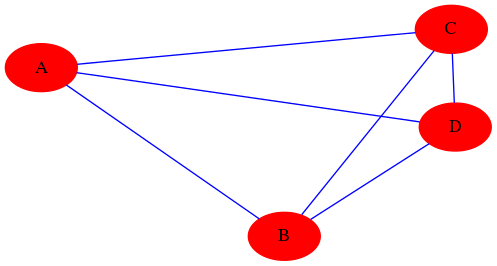

In [8]:
import networkx as nx
import numpy as np
import string

dt = [('len', float)]
A = np.array([(0, 0.3, 0.4, 0.7),
               (0.3, 0, 0.9, 0.2),
               (0.4, 0.9, 0, 0.1),
               (0.7, 0.2, 0.1, 0)
               ])*10
A = A.view(dt)

G = nx.from_numpy_matrix(A)
G = nx.relabel_nodes(G, dict(zip(range(len(G.nodes())),string.ascii_uppercase)))    

G = nx.to_agraph(G)

G.node_attr.update(color="red", style="filled")
G.edge_attr.update(color="blue", width="2.0")

G.draw('/tmp/out.png', format='png', prog='neato')

from IPython.display import Image
Image(filename='/tmp/out.png') 

topic:	euro unie crisis lidstaat markt bevoegdheid munt bevolking soevereiniteit visie
PvdD:	democratisch monetair gezamenlijk grieks vergaand gemeenschappelijk onmogelijk zuidelijk rijk waar
D66:	institutioneel buitenlands duits zwak democratisch afdwingbaar fundamenteel intern moeizaam krachtig
CDA:	gemeenschappelijk essentieel financieel-economisch intern ongekend onderling zuidelijk speciaal monetair zwak
PvdA:	duurzaam buitenlands publiek vroeg duits voortdurend nader goedkoop kennelijk recent
GroenLinks:	democratisch buitenlands stevig eenzijdig duurzaam centraal geloofwaardig structureel permanent automatisch
SGP:	essentieel historisch stevig omstreden gebruikelijk eenvoudig prachtig afhankelijk doorslaggevend interessant
SP:	democratisch monetair rijk diep fundamenteel duits inclusief ondemocratisch vreemd heilig
PVV:	inclusief zwart publiek permanent zuidelijk zuid-europees informeel onmiddellijk buitenlands wakke
50PLUS:	commercieel grotendeels nauwgezet traceerbaar duur mini

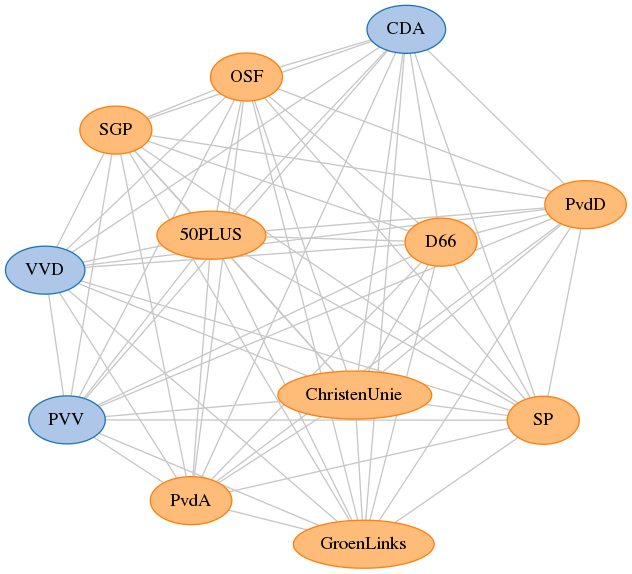

In [9]:
import networkx as nx
import numpy as np
import string

topic = 5

ar = data[topic]

for i in range(ar.shape[0]):
    for j in range(ar.shape[1]):
        if ar[i,j] == 0 and not i == j:
            ar[i,j] = ar[j,i]

perspectives = [u'50PLUS', u'CDA', u'ChristenUnie', u'D66', u'GroenLinks', u'OSF', u'PVV', u'PvdA',
                u'PvdD', u'SGP', u'SP', u'VVD']
government = ['VVD', 'CDA', 'PVV']

dt = [('len', float)]
A = ar*10
A = A.view(dt)

G = nx.from_numpy_matrix(A)
G = nx.relabel_nodes(G, dict(zip(range(len(G.nodes())), perspectives)))

for perp in perspectives:
    G.node[perp]['style'] = 'filled'
    if perp in government:
        G.node[perp]['color'] = '#1f77b4'
        G.node[perp]['fillcolor'] = '#aec7e8'
    else:
        G.node[perp]['color'] = '#ff7f0e'
        G.node[perp]['fillcolor'] = '#ffbb78'        

G = nx.to_agraph(G)
G.graph_attr['outputorder'] = 'edgesfirst'

G.edge_attr.update(color="#c7c7c7", width="1.0")
#G.node_attr.update(color="red", style="filled")

G.draw('/tmp/out.png', format='png', prog='neato')

df = get_top_topic_words(topics, opinions, topic)
print topic_str(df, single_line=True, weights=False)

from IPython.display import Image
Image(filename='/tmp/out.png') 

# http://stackoverflow.com/questions/13814640/color-a-particular-node-in-networkx-and-graphviz

[0.42111002531293751, 0.38703846169352529, 0.39707774594215195, 0.35668247348008253, 0.36640500799431125, 0.30620119037387994, 0.35946582462177068, 0.23582344066413696, 0.38189317869808487, 0.37762903045115853, 0.33017640443109841, 0.31619567389215769, 0.37796786136901817, 0.4185709950919172, 0.40119537079978307, 0.42232467720804123, 0.41323718570955537, 0.39019972051303686, 0.3497399502843781, 0.42111664864682036, 0.42423746778398574, 0.39664178957462382, 0.40218711080108305, 0.38320542604823987, 0.40570695172258098, 0.40842847291244222, 0.36720116099301425, 0.37178513462398155, 0.39550331317001641, 0.4088107594317395, 0.38886361581452489, 0.41577139991631773, 0.39485096949086734, 0.33807273642983693, 0.42340356963318587, 0.34508899541628729, 0.38444151695711115, 0.3563431023488759, 0.36085263109835181, 0.39776106167515946, 0.34229349186300928, 0.2863319021241324, 0.35117102803520145, 0.39790247226609021, 0.36328252307601522, 0.37680954369189984, 0.35248653503755401, 0.358963113142714

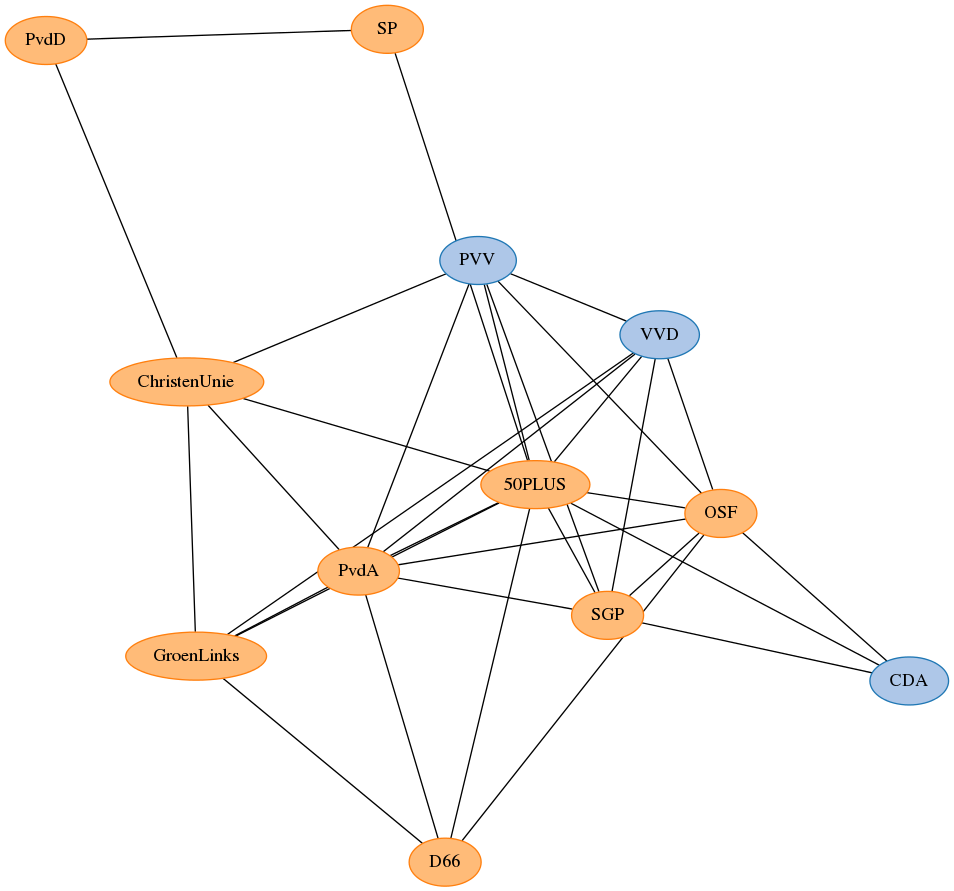

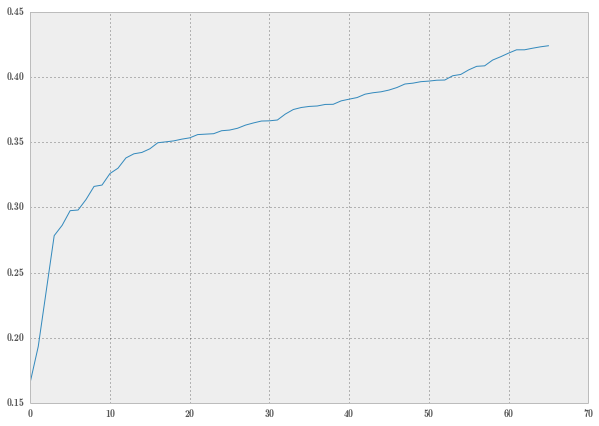

In [10]:
A = ar*10
A = A.view(dt)

G = nx.from_numpy_matrix(A)
G = nx.relabel_nodes(G, dict(zip(range(len(G.nodes())), perspectives)))

ws = [ar[perspectives.index(p1), perspectives.index(p2)] for p1, p2 in G.edges()]

print ws
print max(ws)
print min(ws)

ws.sort()

plt.plot(ws)

for p1, p2 in G.edges():
    #print p1, p2
    #print perspectives.index(p1), perspectives.index(p2)
    #print ar[perspectives.index(p1), perspectives.index(p2)]
    G[p1][p2]['weight'] = 10*ar[perspectives.index(p1), perspectives.index(p2)]

for perp in perspectives:
    G.node[perp]['style'] = 'filled'
    if perp in government:
        G.node[perp]['color'] = '#1f77b4'
        G.node[perp]['fillcolor'] = '#aec7e8'
    else:
        G.node[perp]['color'] = '#ff7f0e'
        G.node[perp]['fillcolor'] = '#ffbb78'        

#print len(G.edges())
for p1, p2 in G.edges():
    if G[p1][p2]['weight'] > 3.7:
        G.remove_edge(p1, p2)
#print len(G.edges())

G = nx.to_agraph(G)
G.graph_attr['outputorder'] = 'edgesfirst'

#G.edge_attr.update(color="#c7c7c7", width="1.0")
#G.node_attr.update(color="red", style="filled")

G.draw('/tmp/out.png', format='png', prog='neato')

df = get_top_topic_words(topics, opinions, topic)
print topic_str(df, single_line=True, weights=False)

from IPython.display import Image
Image(filename='/tmp/out.png') 


In [17]:
print data.shape
print data[5]

(100, 12, 12)
[[ 0.          0.345089    0.31723623  0.35041059  0.35896311  0.19324934
   0.2863319   0.29755941  0.39019972  0.16601706  0.36720116  0.23582344]
 [ 0.345089    0.          0.38886362  0.38444152  0.39485097  0.3563431
   0.4157714   0.42340357  0.37796786  0.33807274  0.39664179  0.39707775]
 [ 0.31723623  0.38886362  0.          0.37926237  0.29807508  0.37915283
   0.35117103  0.32612262  0.34973995  0.37526325  0.37178513  0.38189318]
 [ 0.35041059  0.38444152  0.37926237  0.          0.34123988  0.36495514
   0.39790247  0.35599538  0.42111665  0.3881426   0.39550331  0.37762903]
 [ 0.35896311  0.39485097  0.29807508  0.34123988  0.          0.39215652
   0.39776106  0.35248654  0.40119537  0.37680954  0.38320543  0.36640501]
 [ 0.19324934  0.3563431   0.37915283  0.36495514  0.39215652  0.
   0.36328252  0.36657435  0.42423747  0.27838057  0.40881076  0.3301764 ]
 [ 0.2863319   0.4157714   0.35117103  0.39790247  0.39776106  0.36328252
   0.          0.36085263  

Estimated number of clusters: 3
Homogeneity: 0.872
Completeness: 0.872
V-measure: 0.872
Adjusted Rand Index: 0.912
Adjusted Mutual Information: 0.871
Silhouette Coefficient: 0.753


/usr/lib/pymodules/python2.7/matplotlib/font_manager.py:1246: UserWarning: findfont: Could not match :family=Bitstream Vera Sans:style=normal:variant=normal:weight=normal:stretch=normal:size=x-large. Returning /usr/share/matplotlib/mpl-data/fonts/ttf/cmb10.ttf
  UserWarning)


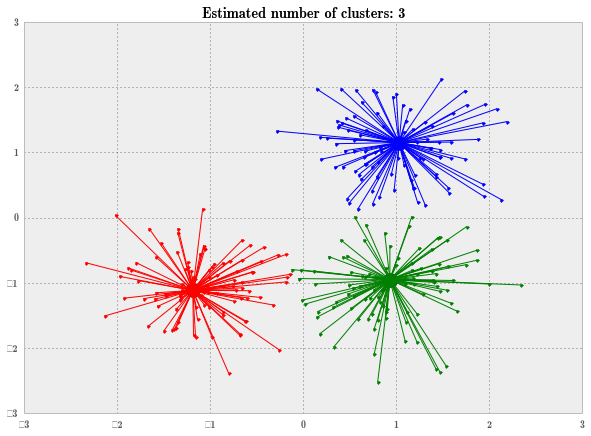

In [18]:
from sklearn.cluster import AffinityPropagation
from sklearn import metrics
from sklearn.datasets.samples_generator import make_blobs

##############################################################################
# Generate sample data
centers = [[1, 1], [-1, -1], [1, -1]]
X, labels_true = make_blobs(n_samples=300, centers=centers, cluster_std=0.5,
                            random_state=0)

##############################################################################
# Compute Affinity Propagation
af = AffinityPropagation(preference=-50).fit(X)
cluster_centers_indices = af.cluster_centers_indices_
labels = af.labels_

n_clusters_ = len(cluster_centers_indices)

print('Estimated number of clusters: %d' % n_clusters_)
print("Homogeneity: %0.3f" % metrics.homogeneity_score(labels_true, labels))
print("Completeness: %0.3f" % metrics.completeness_score(labels_true, labels))
print("V-measure: %0.3f" % metrics.v_measure_score(labels_true, labels))
print("Adjusted Rand Index: %0.3f"
      % metrics.adjusted_rand_score(labels_true, labels))
print("Adjusted Mutual Information: %0.3f"
      % metrics.adjusted_mutual_info_score(labels_true, labels))
print("Silhouette Coefficient: %0.3f"
      % metrics.silhouette_score(X, labels, metric='sqeuclidean'))

##############################################################################
# Plot result
import matplotlib.pyplot as plt
from itertools import cycle

plt.close('all')
plt.figure(1)
plt.clf()

colors = cycle('bgrcmykbgrcmykbgrcmykbgrcmyk')
for k, col in zip(range(n_clusters_), colors):
    class_members = labels == k
    cluster_center = X[cluster_centers_indices[k]]
    plt.plot(X[class_members, 0], X[class_members, 1], col + '.')
    plt.plot(cluster_center[0], cluster_center[1], 'o', markerfacecolor=col,
             markeredgecolor='k', markersize=14)
    for x in X[class_members]:
        plt.plot([cluster_center[0], x[0]], [cluster_center[1], x[1]], col)

plt.title('Estimated number of clusters: %d' % n_clusters_)
plt.show()


topic:	procedure asielzoeker terugkeer bevoegdheid label opvang immigratie vreemdeling herkomst asiel
PvdD:	binnenboord gruwelijk gevaarlijk wenselijk stoer seksueel vrolijk mondiaal oneerlijk afhankelijk
D66:	afghaans facultatief discretionair zelfstandig doorslaggevend klinisch-medisch vals menselijk psychisch measure
CDA:	discretionair vrijwillig humaan feitelijk rechtvaardig actueel zorgvuldig regulier onmiddellijk schrijnend
PvdA:	irakees vrijwillig discretionair medisch onmogelijk onhoudbaar feitelijk voormalig minderjarig onbekend
GroenLinks:	discretionair minderjarig zichtbaar structureel schrijnend streng alleenstaand vals volstrekt humaan
SGP:	langdurig discretionair schrijnend allereerst kennelijk populair minderjarig ruimhartig jarenlang onherroepelijk
SP:	medisch psychisch veilig gemiddeld discretionair minderjarig simpel aardig handig klinisch
PVV:	kennelijk medisch iraaks vrijwillig plotseling links rechterlijk letterlijk absurd oké
50PLUS:	eenzijdig welig schrijnend koe

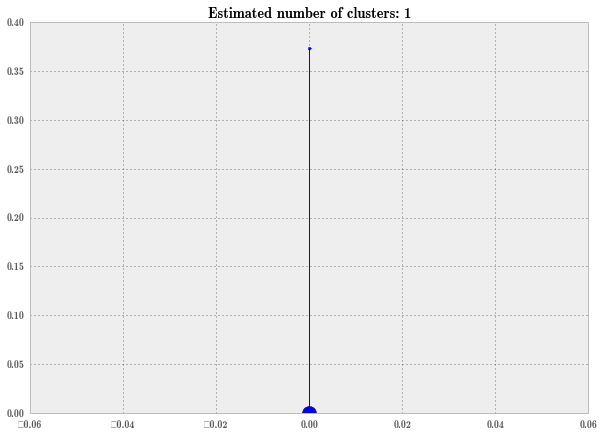

In [50]:
from sklearn.cluster import AffinityPropagation
from sklearn import metrics

topic = 80

df = get_top_topic_words(topics, opinions, topic)
print topic_str(df, single_line=True, weights=False)

X = data[topic]

# Compute Affinity Propagation
af = AffinityPropagation(affinity='precomputed').fit(X)
cluster_centers_indices = af.cluster_centers_indices_
labels = af.labels_

for p, l in zip(perspectives, labels):
    print p, l

n_clusters_ = len(cluster_centers_indices)

print('Estimated number of clusters: %d' % n_clusters_)
#print("Homogeneity: %0.3f" % metrics.homogeneity_score(labels_true, labels))
#print("Completeness: %0.3f" % metrics.completeness_score(labels_true, labels))
#print("V-measure: %0.3f" % metrics.v_measure_score(labels_true, labels))
#print("Adjusted Rand Index: %0.3f"
#      % metrics.adjusted_rand_score(labels_true, labels))
#print("Adjusted Mutual Information: %0.3f"
#      % metrics.adjusted_mutual_info_score(labels_true, labels))
#print("Silhouette Coefficient: %0.3f"
#      % metrics.silhouette_score(X, labels, metric='sqeuclidean'))

##############################################################################
# Plot result
import matplotlib.pyplot as plt
from itertools import cycle

plt.close('all')
plt.figure(1)
plt.clf()

colors = cycle('bgrcmykbgrcmykbgrcmykbgrcmyk')
for k, col in zip(range(n_clusters_), colors):
    class_members = labels == k
    cluster_center = X[cluster_centers_indices[k]]
    plt.plot(X[class_members, 0], X[class_members, 1], col + '.')
    plt.plot(cluster_center[0], cluster_center[1], 'o', markerfacecolor=col,
             markeredgecolor='k', markersize=14)
    for x in X[class_members]:
        plt.plot([cluster_center[0], x[0]], [cluster_center[1], x[1]], col)

plt.title('Estimated number of clusters: %d' % n_clusters_)
plt.show()


In [11]:
jsd2 = jsd.sort(['sums'], ascending=False)


In [12]:
perspectives = [u'50PLUS', u'CDA', u'ChristenUnie', u'D66', u'GroenLinks', u'OSF', u'PVV', u'PvdA',
                u'PvdD', u'SGP', u'SP', u'VVD']